In [47]:
import tensorflow as tf
import keras
from keras.layers import Dense , Conv2D , MaxPooling2D , GlobalAveragePooling2D , Dropout , Flatten , BatchNormalization
from keras.optimizers import Adam 
import matplotlib.pyplot as plt

In [48]:
img_size = 128
batch_size = 16
epochs = 15
lr = 0.0001

In [49]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    directory="C:\\Movies\\asl_alphabet_train",
    validation_split=0.1,
    subset="training",
    seed=123,
    image_size=(img_size, img_size),
    batch_size=batch_size
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    directory="C:\\Movies\\asl_alphabet_train",
    validation_split=0.1,
    subset="validation",
    seed=123,
    image_size=(img_size, img_size),
    batch_size=batch_size
)

# test_dataset = tf.keras.utils.image_dataset_from_directory(
#     directory="C:\\Movies\\asl_alphabet_test",
#     image_size=(img_size, img_size),
#     batch_size=batch_size
# )


Found 87000 files belonging to 29 classes.
Using 78300 files for training.
Found 87000 files belonging to 29 classes.
Using 8700 files for validation.


In [50]:
class_names = train_dataset.class_names
num_classes = len(class_names)
print(class_names)
print(num_classes)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
29


In [51]:
def process(image, label):
    image = tf.cast(image/255. ,tf.float32)
    return image, label

train_dataset = train_dataset.map(process)
validation_dataset = validation_dataset.map(process)

In [52]:
model = keras.Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(
    optimizer=Adam(learning_rate=lr),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 16, 16, 128)     

In [53]:
history = model.fit(train_dataset, epochs=epochs, validation_data=validation_dataset)

Epoch 1/15
4894/4894 [==============================] - 148s 30ms/step - loss: 1.0093 - accuracy: 0.7021 - val_loss: 0.2776 - val_accuracy: 0.9123
Epoch 2/15
4894/4894 [==============================] - 144s 29ms/step - loss: 0.1771 - accuracy: 0.9443 - val_loss: 0.1241 - val_accuracy: 0.9617
Epoch 3/15
4894/4894 [==============================] - 142s 29ms/step - loss: 0.0815 - accuracy: 0.9740 - val_loss: 0.0703 - val_accuracy: 0.9772
Epoch 4/15
4894/4894 [==============================] - 145s 30ms/step - loss: 0.0475 - accuracy: 0.9850 - val_loss: 0.0634 - val_accuracy: 0.9785
Epoch 5/15
4894/4894 [==============================] - 148s 30ms/step - loss: 0.0355 - accuracy: 0.9890 - val_loss: 0.0351 - val_accuracy: 0.9907
Epoch 6/15
4894/4894 [==============================] - 147s 30ms/step - loss: 0.0255 - accuracy: 0.9926 - val_loss: 0.0418 - val_accuracy: 0.9839
Epoch 7/15
4894/4894 [==============================] - 149s 30ms/step - loss: 0.0200 - accuracy: 0.9943 - val_loss: 0

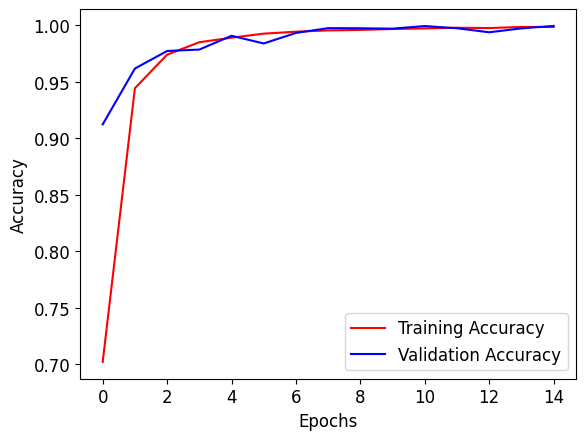

In [54]:
plt.rcParams.update({'font.size': 12})
plt.plot(history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

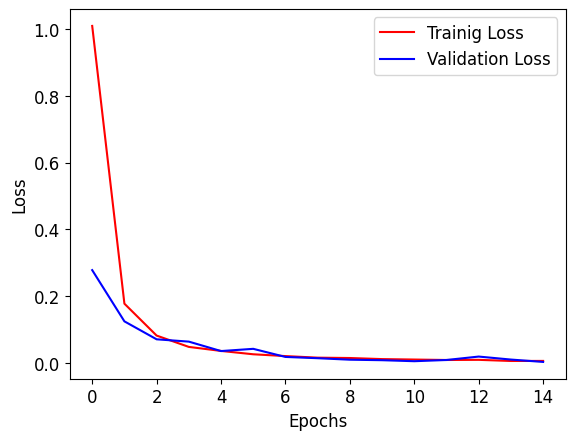

In [55]:
plt.rcParams.update({'font.size': 12})
plt.plot(history.history['loss'], color='red', label='Trainig Loss')
plt.plot(history.history['val_loss'], color='blue', label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [56]:
model.save("C:\\Code_EveryThing\\Git_Project\\SignLanguageMnist\\model.h5")